# Project 3

# Part I - ProsperLoan Dataset  Exploration
## by Augustine Phiri

## Introduction
> In this part, I will be exploring data set that contains 113,937 loans with 81 variables on each loan. The dataset includes loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

> I will not explore all of the variables in the dataset! I will Focus my exploration on about 10-15 of them.



## Preliminary Wrangling



In [13]:
# importing all packages and setting plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load `prosperLoanData.csv`in my dataset using pandas funtion `pd.read_csv`.


In [14]:
# Loading prosperLoanData.cvs
df_loan = pd.read_csv('prosperLoanData.csv')

##### high-level overview of data shape and composition

In [15]:
# Checking shape of the dataset
df_loan.shape

(113937, 81)

In [17]:
df_loan.dtypes

ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object

In [18]:
# Reading the dataset
df_loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


### What is the structure of your dataset?

> The dataset has 113,937 rows of data with 81 columns of variables. The structure includes;
- ListingKey
- ListingCreationDate
- LoanOriginationDate
- DateCreditPulled
- ProsperRating
- Term
- ListingCategory
- LoanOriginalAmount
- BorrowerApr
- EstimatedReturn
- LoanStatus
- StatedMonthlyIncome
- IsBorrowerHomeowner
> And others.

## What is/are the main feature(s) of interest in your dataset?

> The main features of interest in my dataset and which I will put much of my focus are the borrower's interest rate (BorrowerRate) and the current loan status (LoanStatus).



### What features in the dataset, do you think will help support your investigation into your feature(s) of interest?

> This dataset have some features that will support the investigation of my choosen features of interest, and these include `employment status (EmploymentStatus)`, `the credit score of the applicant (CreditScoreRangeUpper)`, `income range`, and `debt to income ratio`. The Possible questions to focus on are:

- What factors affect a loan’s outcome status?
- What affects the borrower’s APR or interest rate?
- Are there differences between loans depending on how large the original loan amount was?

In [53]:
#making copy of data inorder to leave the original untampered
loan_clean = df_loan.copy()

#saving the copied data into the file prosperloan_edited.csv

loan_clean.to_csv('prosperloan_edited.csv')

In [54]:
#Loading cleared data
loan_clean = pd.read_csv('prosperloan_edited.csv')

> As the first step, I will remove the column that am not interested to use in this analysis

In [55]:
loan_clean.drop(columns=['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade', 'ClosedDate', 'LenderYield',
                 'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn', 'ProsperRating (numeric)', 
                 'ProsperRating (Alpha)', 'BorrowerState', 'Occupation', 'EmploymentStatusDuration', 'CurrentlyInGroup', 
                 'GroupKey', 'DateCreditPulled', 'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines', 
                 'TotalCreditLinespast7years', 'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries', 
                 'DelinquenciesLast7Years', 'PublicRecordsLast10Years', 'PublicRecordsLast12Months', 'RevolvingCreditBalance',
                 'BankcardUtilization', 'AvailableBankcardCredit', 'TotalTrades', 'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months',
                'IncomeVerifiable', 'LoanKey', 'TotalProsperLoans', 'TotalProsperPaymentsBilled',
                 'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate',
                 'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing', 
                 'LoanFirstDefaultedCycleNumber', 'LoanMonthsSinceOrigination', 'LoanOriginationQuarter', 'MemberKey', 
                 'MonthlyLoanPayment', 'LP_CustomerPayments', 'LP_CustomerPrincipalPayments', 'LP_InterestandFees', 
                 'LP_ServiceFees', 'LP_CollectionFees', 'LP_GrossPrincipalLoss', 'LP_NetPrincipalLoss', 
                 'LP_NonPrincipalRecoverypayments', 'PercentFunded', 'Recommendations', 'InvestmentFromFriendsCount', 
                 'InvestmentFromFriendsAmount', 'Investors'], inplace=True)

> I will convert Loan Origination Date from string into datetime stamp

In [56]:
# Convert LoanOriginationDate to a datetime dtype
loan_clean.LoanOriginationDate = pd.to_datetime(loan_clean.LoanOriginationDate)

In [57]:
# Rename Columns to be standard
loan_clean.rename(columns = {"ListingCategory (numeric)":"ListingCategory", "BorrowerAPR": "BorrowerApr"}, inplace = True)

In [58]:
# Checking for summary description of Dataset
loan_clean.describe()

,Unnamed: 0,Term,BorrowerApr,BorrowerRate,ProsperScore,ListingCategory,CreditScoreRangeLower,CreditScoreRangeUpper,OpenRevolvingAccounts,CurrentDelinquencies,AmountDelinquent,DebtToIncomeRatio,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanNumber,LoanOriginalAmount
count,113937.000000,113937.000000,113912.000000,113937.000000,84853.000000,113937.000000,113346.000000,113346.000000,113937.00000,113240.000000,106315.000000,105383.000000,1.139370e+05,113937.000000,113937.000000,113937.00000
mean,56968.000000,40.830248,0.218828,0.192764,5.950067,2.774209,685.567731,704.567731,6.96979,0.592052,984.507059,0.275947,5.608026e+03,152.816539,69444.474271,8337.01385
std,32890.923148,10.436212,0.080364,0.074818,2.376501,3.996797,66.458275,66.458275,4.63097,1.978707,7158.270157,0.551759,7.478497e+03,466.320254,38930.479610,6245.80058
min,0.000000,12.000000,0.006530,0.000000,1.000000,0.000000,0.000000,19.000000,0.00000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,1000.00000
25%,28484.000000,36.000000,0.156290,0.134000,4.000000,1.000000,660.000000,679.000000,4.00000,0.000000,0.000000,0.140000,3.200333e+03,0.000000,37332.000000,4000.00000
50%,56968.000000,36.000000,0.209760,0.184000,6.000000,1.000000,680.000000,699.000000,6.00000,0.000000,0.000000,0.220000,4.666667e+03,0.000000,68599.000000,6500.00000
75%,85452.000000,36.000000,0.283810,0.250000,8.000000,3.000000,720.000000,739.000000,9.00000,0.000000,0.000000,0.320000,6.825000e+03,0.000000,101901.000000,12000.00000
max,113936.000000,60.000000,0.512290,0.497500,11.000000,20.000000,880.000000,899.000000,51.00000,83.000000,463881.000000,10.010000,1.750003e+06,2704.000000,136486.000000,35000.00000


In [59]:
loan_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Unnamed: 0                 113937 non-null  int64         
 1   Term                       113937 non-null  int64         
 2   LoanStatus                 113937 non-null  object        
 3   BorrowerApr                113912 non-null  float64       
 4   BorrowerRate               113937 non-null  float64       
 5   ProsperScore               84853 non-null   float64       
 6   ListingCategory            113937 non-null  int64         
 7   EmploymentStatus           111682 non-null  object        
 8   IsBorrowerHomeowner        113937 non-null  bool          
 9   CreditScoreRangeLower      113346 non-null  float64       
 10  CreditScoreRangeUpper      113346 non-null  float64       
 11  OpenRevolvingAccounts      113937 non-null  int64   

## Univariate Exploration

> I'll start by looking at the distribution of the main variable of interest: Loan Status.


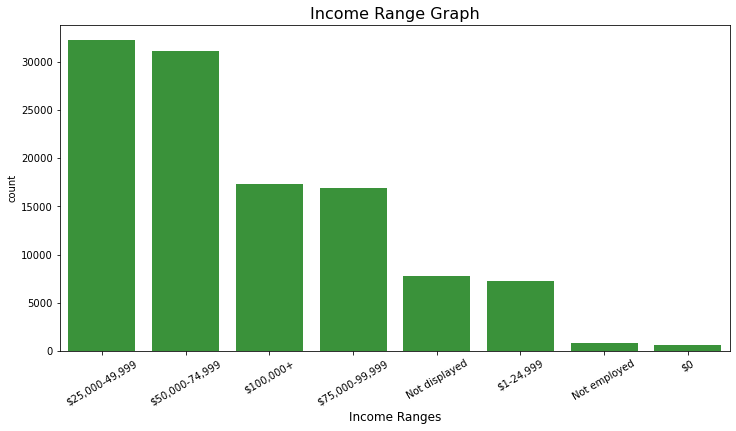

In [60]:
# Plotting a Income Range standard-scaled bar plot
cat_order = loan_clean['IncomeRange'].value_counts().index
plt.figure(figsize=[12, 6])
default_color = sb.color_palette()[2]
sb.countplot(data=loan_clean, x='IncomeRange', color=default_color, order=cat_order)
plt.title('Income Range Graph', fontsize=16)
plt.xlabel('Income Ranges', fontsize=12)
plt.xticks(rotation=30);

> The graph shows that there is highest concentration of incomes between 25,000 and  49,999 USD($).

> Lets look at the distribution of Borrower`s interest Rate (BorrowerRate)

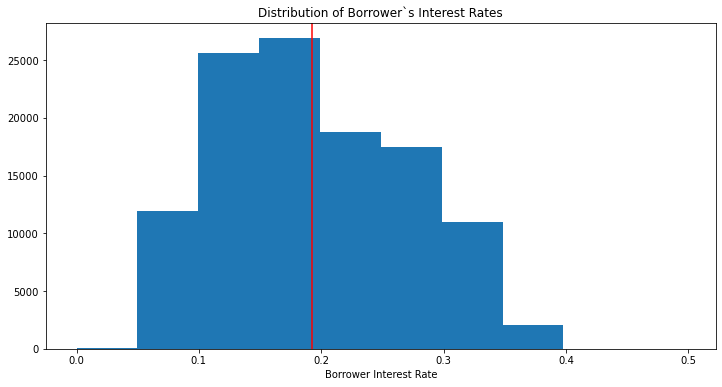

In [61]:
#Ploting hist graph for BorrowerRate

mean_rate = loan_clean.BorrowerRate.mean()

#Plotting 
plt.figure(figsize=[12, 6])
plt.hist(data = loan_clean, x = 'BorrowerRate')
plt.xlabel('Borrower Interest Rate');
plt.axvline(x=mean_rate, color='r');
plt.title('Distribution of Borrower`s Interest Rates');

> The graph shows that the distribution of borrower interest rates is right skewed, and most of the borrowers fell within the higher interest rate loans.

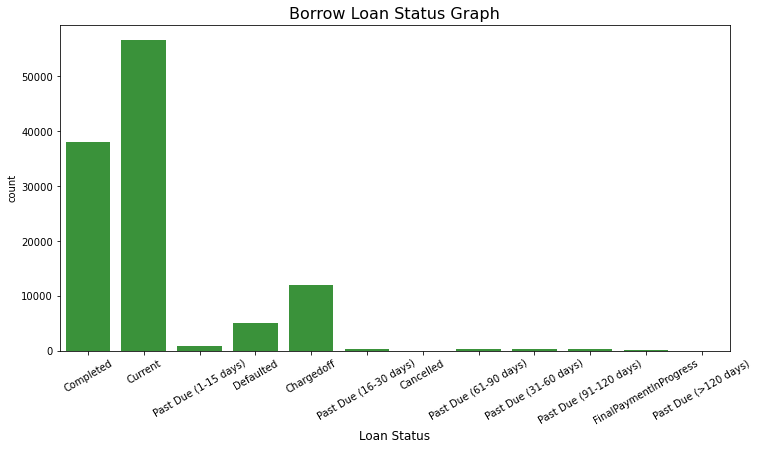

In [62]:
# Plotting bar graph for Loan Status
plt.figure(figsize=[12, 6])
sb.countplot(data=loan_clean, x='LoanStatus', color=default_color);
plt.xticks(rotation=90);
plt.title('Borrow Loan Status Graph', fontsize=16)
plt.xlabel('Loan Status', fontsize=12)
plt.xticks(rotation=30);

> I will try to combine all past Due in the Loan Status column to make my visualization simple and very clear.

In [63]:
# Combining all Pervious Due loans into a unique loan status called `Past_due`
loan_clean['LoanStatus'] = loan_clean['LoanStatus'].apply(lambda x: x if 'Past Due' not in x else 'Past Due')

# Convert LoanStatus to a categorical variable
status_dict = ['Defaulted','Chargedoff', 'Past_due', 'FinalPaymentInProgress','Current', 'Completed']

ordered_loan_status = pd.api.types.CategoricalDtype(ordered = True, categories = status_dict)

loan_clean['LoanStatus'] = loan_clean['LoanStatus'].astype(ordered_loan_status)

Text(0.5, 0, 'Loan Status')

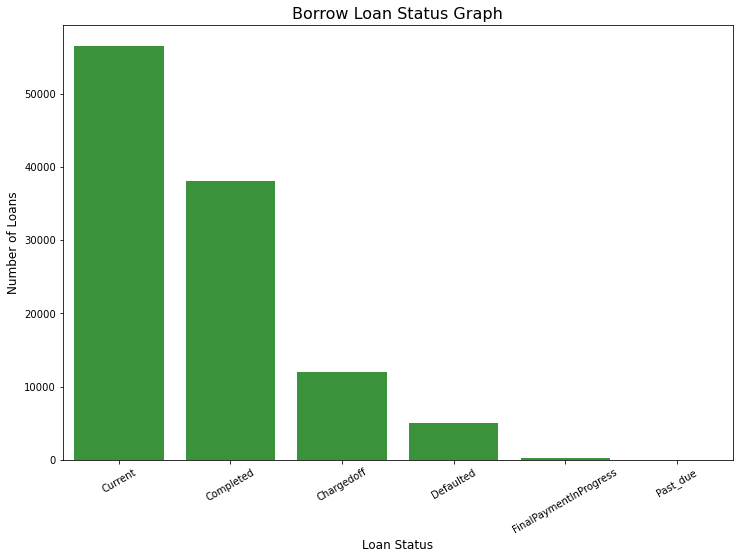

In [64]:
# Re-Plotting LoanStatus bar chat

df_color = sb.color_palette()[2]

# Ordering the categorical variable type
category_order = loan_clean['LoanStatus'].value_counts().index
plt.figure(figsize=(12,8))
sb.countplot(data = loan_clean, x = 'LoanStatus', color = df_color, order=category_order)
plt.ylabel('Number of Loans', fontsize=12)
plt.title('Borrow Loan Status Graph', fontsize=16)
plt.xticks(rotation=30)
plt.xlabel('Loan Status', fontsize=12)

> Looking at this graph, we can see that the majority of loans are either in current or completed status.

In [65]:
# Coming up with percentages of loans in each status

status_percent = pd.DataFrame(loan_clean.groupby('LoanStatus')['LoanStatus'].count())
status_percent['Loan Status (%)'] = (status_percent['LoanStatus']/status_percent['LoanStatus'].sum())*100
status_percent.sort_values(by='Loan Status (%)', ascending=False)

,LoanStatus,Loan Status (%)
LoanStatus,,
Current,56576,50.575247
Completed,38074,34.035668
Chargedoff,11992,10.720064
Defaulted,5018,4.485764
FinalPaymentInProgress,205,0.183257
Past_due,0,0.000000


> We can tell that about 50% of all Prosper loans are in current state and being paid by Prosper's borrowers, 34 percent are completed. However, about 11% of Prosper's loans were `charged off`, 4 % were defaulted and about 0% percent of loans are past due.


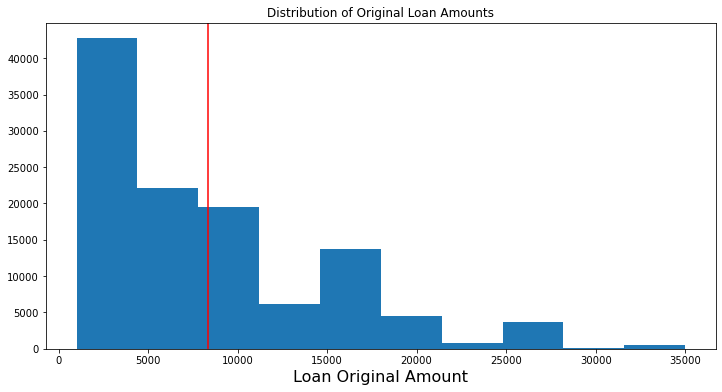

In [66]:
# Plotting Loan Original Amount bar standard plot

mean_loan_amount = loan_clean.LoanOriginalAmount.mean()

plt.figure(figsize=[12, 6])
plt.hist(data = loan_clean, x = 'LoanOriginalAmount')
plt.xlabel('Loan Original Amount', fontsize=16);
plt.axvline(x=mean_loan_amount, color='r');
plt.title('Distribution of Original Loan Amounts', fontsize=12);

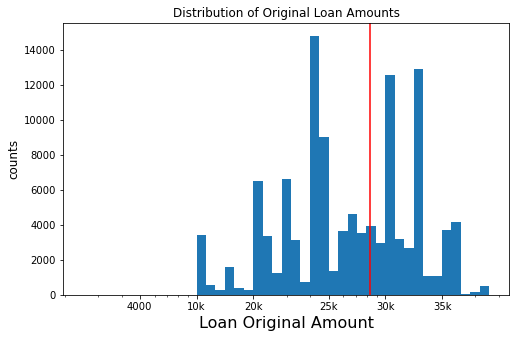

In [67]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.05
bins = 10 ** np.arange(2.4, np.log10(loan_clean['LoanOriginalAmount'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loan_clean, x = 'LoanOriginalAmount', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [4000, '10k', '20k', '25k', '30k', '35k'])
plt.xlabel('Loan Original Amount', fontsize=16);
plt.ylabel('counts', fontsize=12)
plt.axvline(x=mean_loan_amount, color='r');
plt.title('Distribution of Original Loan Amounts', fontsize=12);

> Loan orginal amount has a long-tailed distribution, with a lot of loans on the low original amount end, and few on the high original amount end. When plotted on a log-scale, the Loan original amount distribution looks roughly bimodal, with peaks on `10000, 20000, 22000, 32000, 34000 and 35000` (Could be interesting to see what types of loans are at those amounts). Interestingly, there's a steep jump in frequency right after every peak, rather than a smooth ramp up.

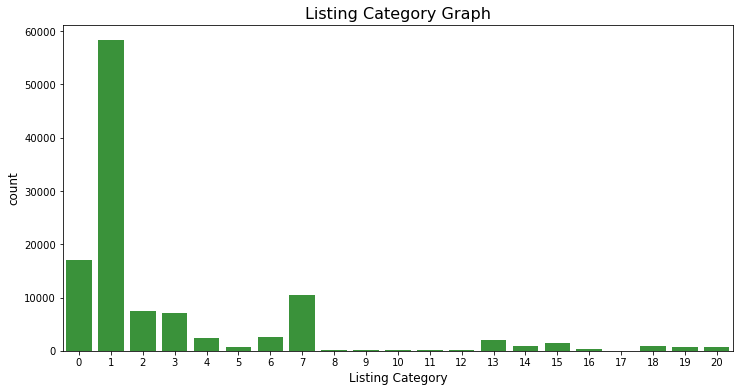

In [68]:
# Plotting ListingCategory bar standard plot
plt.figure(figsize=[12, 6])
sb.countplot(data=loan_clean, x='ListingCategory', color=default_color);
plt.title('Listing Category Graph', fontsize=16)
plt.xlabel('Listing Category', fontsize=12)
plt.ylabel('count', fontsize=12);

> it seems to me that a lot of the loans were debt consolidation.

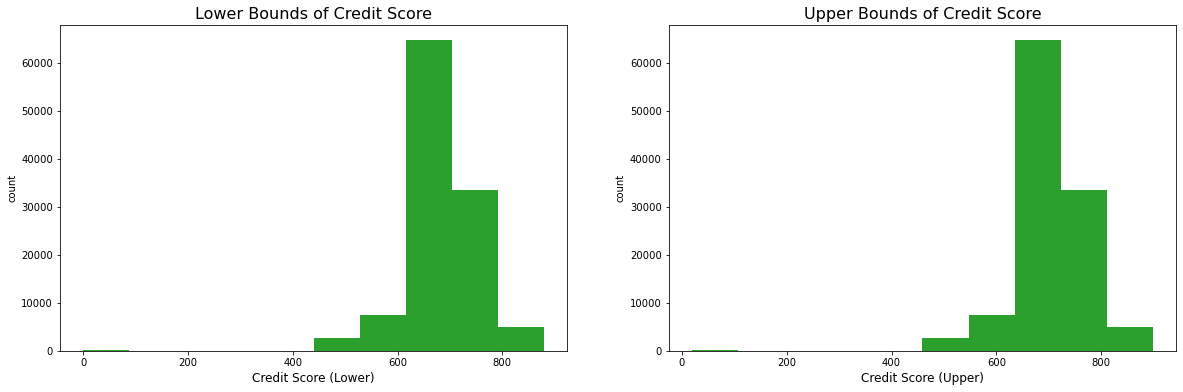

In [69]:
# lets plot both graphs of Credit Score Range Lower and Credit Score Range Upper side by side.

plt.figure(figsize=[20,6])

#Plotting graph to the left
plt.subplot(1,2,1)
plt.hist(data = loan_clean, x = 'CreditScoreRangeLower', color = default_color);
plt.title('Lower Bounds of Credit Score', fontsize=16)
plt.xlabel('Credit Score (Lower)', fontsize=12)
plt.ylabel('count');

#Plotting graph at right side
plt.subplot(1,2,2)
plt.hist(data = loan_clean, x = 'CreditScoreRangeUpper', color = default_color);
plt.title('Upper Bounds of Credit Score', fontsize=16)
plt.xlabel('Credit Score (Upper)', fontsize=12)
plt.ylabel('count');

> After visualizing these graphs, we can see that both distributions are the exact same.

### Discuss the distribution(s) of  variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The exploratory analysis showed that most of Prosper's borrowers are employed, and that most of loans are in cureent status.

> After completing my analysis I found that the average debt to income ratio is about 20% which is an indication that Prosper borrowers are doing everything possible in reducing their risk.

> Since the original loan amount histogram was skewed, I tried a log transformation to see if it would help provide additional details. With the log transformation, the data appeared somehow bimodal. There were spikes at loan amounts of 10000, 20000, 22000, 32000, 34000 and 35000. I am very interested to see what types of loans are associated with those amounts.

### Of the features investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The loan or listing category indicates that most of Prosper loans are debt consolidation. Indicating that Prosper should do a better job to correctly classify its loans.

> There was an issue with loan status, I observed that there was very little differences in the past due categories with about 1.81%. So, I consolidated all under a single category called Past due.

> The credit range upper and lower seems to contain the same data, so I will just use one of those columns when trying to determine if credit score affected borrow interest rates.

> All Columns that were not needed for this analysis were removed in order to make the dataset more manageable. I also changed data types to datetime or categorical as required and made the variables `IncomeRange`, `EmploymentStatus`, and `LoanStatus` ordered `categorical data types`.

## Bivariate Exploration

> In this section, I will investigate relationships between pairs of variables in my data. I make sure the variables that I cover here have been introduced in some fashion in the previous section (univariate exploration).

*Firstly, I will used heatMap to visualize the relation between Numerical and categorical variables*

In [70]:
# Numberical vs Categorical features in my dataset are;

numerical_vars = ['BorrowerRate', 'CreditScoreRangeUpper', 'OpenRevolvingAccounts', 'AmountDelinquent', 'DebtToIncomeRatio', 
                  'StatedMonthlyIncome', 'LoanOriginalAmount']
categorical_vars = ['LoanStatus', 'EmploymentStatus', 'ListingCategory', 'IncomeRange']

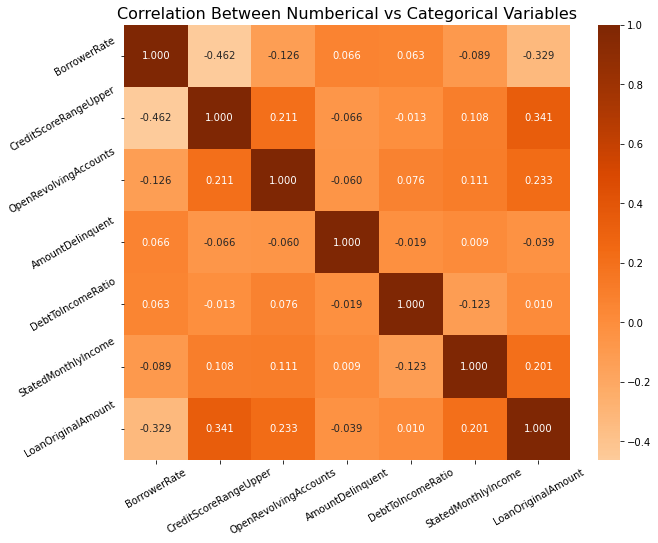

In [71]:

# Heat Map Correlation plot
df_color = sb.color_palette()[3]
plt.figure(figsize = [10, 8])
sb.heatmap(loan_clean[numerical_vars].corr(), annot = True, fmt = '.3f', cmap = 'Oranges', center = 0)
plt.title('Correlation Between Numberical vs Categorical Variables', fontsize=16)
plt.xticks(rotation=30)
plt.yticks(rotation=30)
plt.show();

> Heat Map plot shows that there is correlation between Credit score and Borrow Rate. So, I will so examine this in detail for stong insight.

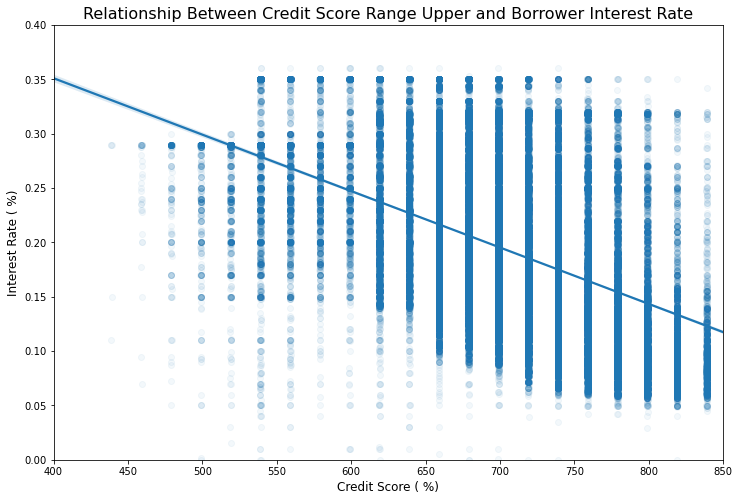

In [86]:
# Plotting the graph of correlation between Credit Score range upper and borrower rate
plt.figure(figsize=(12,8))
sb.regplot(data=loan_clean, x='CreditScoreRangeUpper', y="BorrowerRate", truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/20});
plt.xlim(400, 850);
plt.ylim(0, .4);
plt.xlabel('Credit Score ( %)', fontsize=12);
plt.ylabel('Interest Rate ( %)', fontsize=12 );
plt.title('Relationship Between Credit Score Range Upper and Borrower Interest Rate', fontsize=16);
plt.show()

> There is  weak negative correlation between the credit score  and the borrower interest rate. As the credit score increases, the interest rate slowly decreases.

> Lets run a grid of scatter plots to get an overall view of the influence of categorical variables on borrower interest rates and loan amounts.

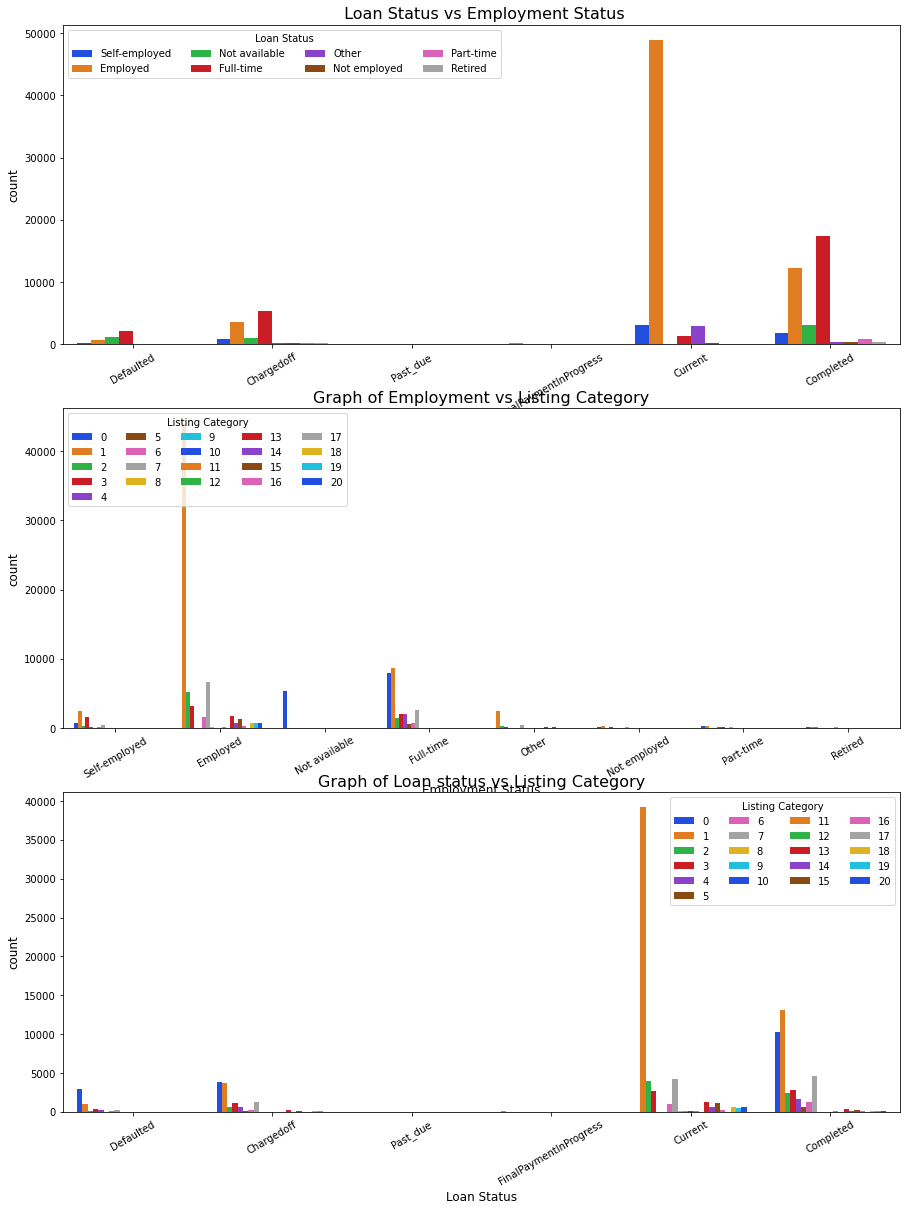

In [91]:
#Plot the categorical variables against each other
plt.figure(figsize = [15, 20])

# subplot 1: EmploymentStatus vs. LoanStatus
ax= plt.subplot(3, 1, 1)
sb.countplot(data = loan_clean, x = 'LoanStatus', hue ='EmploymentStatus' , palette = 'bright')
ax.legend(loc=2, ncol = 4, title='Loan Status');
plt.title(' Loan Status vs Employment Status', fontsize = 16)
plt.xlabel('Employment Status', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.xticks(rotation=30);

# subplot 2: EmploymentStatus vs ListingCategory
ax = plt.subplot(3, 1, 2)
sb.countplot(data = loan_clean, x = 'EmploymentStatus', hue = 'ListingCategory', palette = 'bright')
ax.legend(loc=2, ncol = 5, title="Listing Category"); # re-arrange legend to reduce overlapping
plt.title('Graph of Employment vs Listing Category', fontsize = 16)
plt.xlabel('Employment Status', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.xticks(rotation=30);

# subplot 3: LoanStatus vs ListingCategory
ax = plt.subplot(3, 1, 3)
sb.countplot(data = loan_clean, x = 'LoanStatus', hue = 'ListingCategory', palette = 'bright')
ax.legend(loc = 1, ncol = 4, title="Listing Category");
plt.title('Graph of Loan status vs Listing Category', fontsize = 16)
plt.xlabel('Loan Status', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.xticks(rotation=30);

> Looking at the graphs above, the majority of current or completed loans were debt consolidation loans which is shows the highest distribution frequency, regardless of employment status. It is not surprising to see more employed people having current loan status.

<Figure size 1440x2880 with 0 Axes>

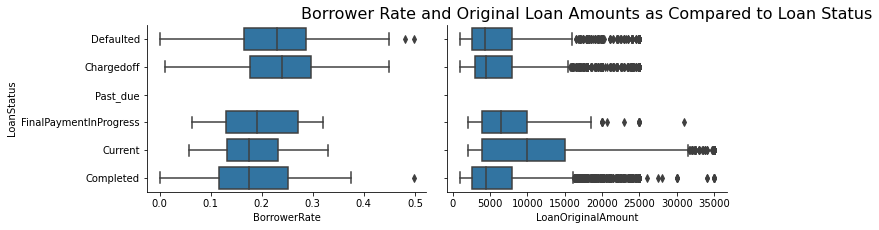

In [93]:
#Taking a closer look at Borrowers Rate and Original Loan Amounts as Compared to Loan Status
def boxgrid(x, y, **kwargs):
    base_color= sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color = base_color)

# Ploating 
plt.figure(figsize = [20, 40]);
g = sb.PairGrid(data = loan_clean, y_vars = 'LoanStatus' , x_vars = ['BorrowerRate', 'LoanOriginalAmount'], height = 3, aspect = 1.5);
g.map(boxgrid);
plt.title('Borrower Rate and Original Loan Amounts as Compared to Loan Status', fontsize=16);

> there is no much difference between the categories of `LoanStatus` and the `borrower interest rate`.However, `charged off` and `defaulted loans` are higher than the rest. Comparing `loan status` to the `original loan amounts`, it actually appears as though the larger the loan, the more chance of staying current loan status.

### Some of the relationships observed in this part of the investigation,  How did the feature(s) of interest vary with other features in the dataset?

> After creating a heat map, there were no strong positive correlations among the numeric variables. The only correlation that was a litle big stronger than the rest was a negative relationship between borrower interest rates and credit score.

> However, when I ran the borrower interest rates against the categorical variables, the income range categories of `Not employed` showed a relationship with a higher borrower interest rate, which was expected. Similarly a higher interest rate was shown among the unemployed individuals.

> Interesting to see that the average loan amount for the defaulted or overdue dataframe was less than the dataframe as a whole but the interest rate for those loans was higher by .04.

### Interesting relationships between the other features (not the main feature(s) of interest)

> It was observed that Debt consolidation and baby adoption accounted for the highest loan amounts and the higher the income, the higher the loan appears to be. It was seen that the loan current status was occupied full-time employed individuals.

## Multivariate Exploration

> Create plots of three variables to investidate further in detail the impact of `credit score` and `loan amount` on `borrower interest rates`.

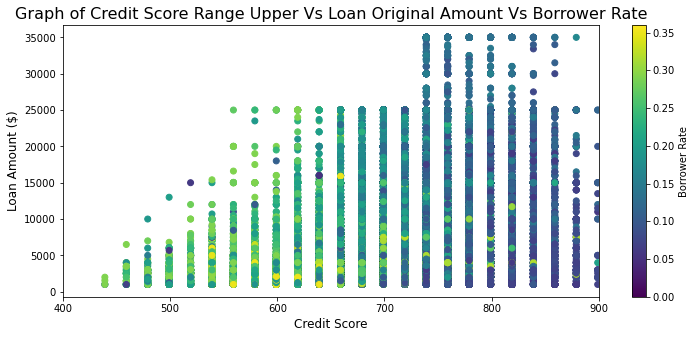

In [84]:
#Scatter plot using original LoanOriginalAmount
plt.figure(figsize=[12,5])
plt.scatter(data=loan_clean, x='CreditScoreRangeUpper', y='LoanOriginalAmount', c='BorrowerRate');
plt.colorbar(label='Borrower Rate');
plt.xlim(400, 900);
plt.title('Graph of Credit Score Range Upper Vs Loan Original Amount Vs Borrower Rate', fontsize=16)
plt.ylabel('Loan Amount ($)', fontsize=12);
plt.xlabel('Credit Score', fontsize=12);

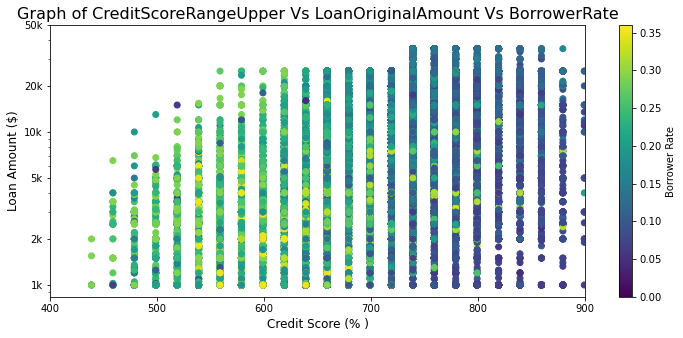

In [94]:
#Now try with LoanOriginalAmount log transformed.
plt.figure(figsize=[12,5])
plt.scatter(data=loan_clean, x='CreditScoreRangeUpper', y='LoanOriginalAmount', c='BorrowerRate');
plt.colorbar(label='Borrower Rate');
plt.yscale('log')
plt.yticks([1e3, 2e3, 5e3, 1e4, 2e4, 5e4], ['1k', '2k', '5k','10k', '20k', '50k'])
plt.xlim(400, 900);
plt.title('Graph of CreditScoreRangeUpper Vs LoanOriginalAmount Vs BorrowerRate', fontsize=16)
plt.ylabel('Loan Amount ($)', fontsize=12);
plt.xlabel('Credit Score (% )', fontsize=12);

> We can clear see from the chat above that as the borrower's `credit score` increases, the interest borrowers `interest rate`` decreases. Although it is not as serous as we can imagine, there are some instances where `loan amount` affect on the interest rate as well.

> Finally, I will run a grid of scatter plots for an overview of the relationships between borrower interest rates, credit scores, and income.

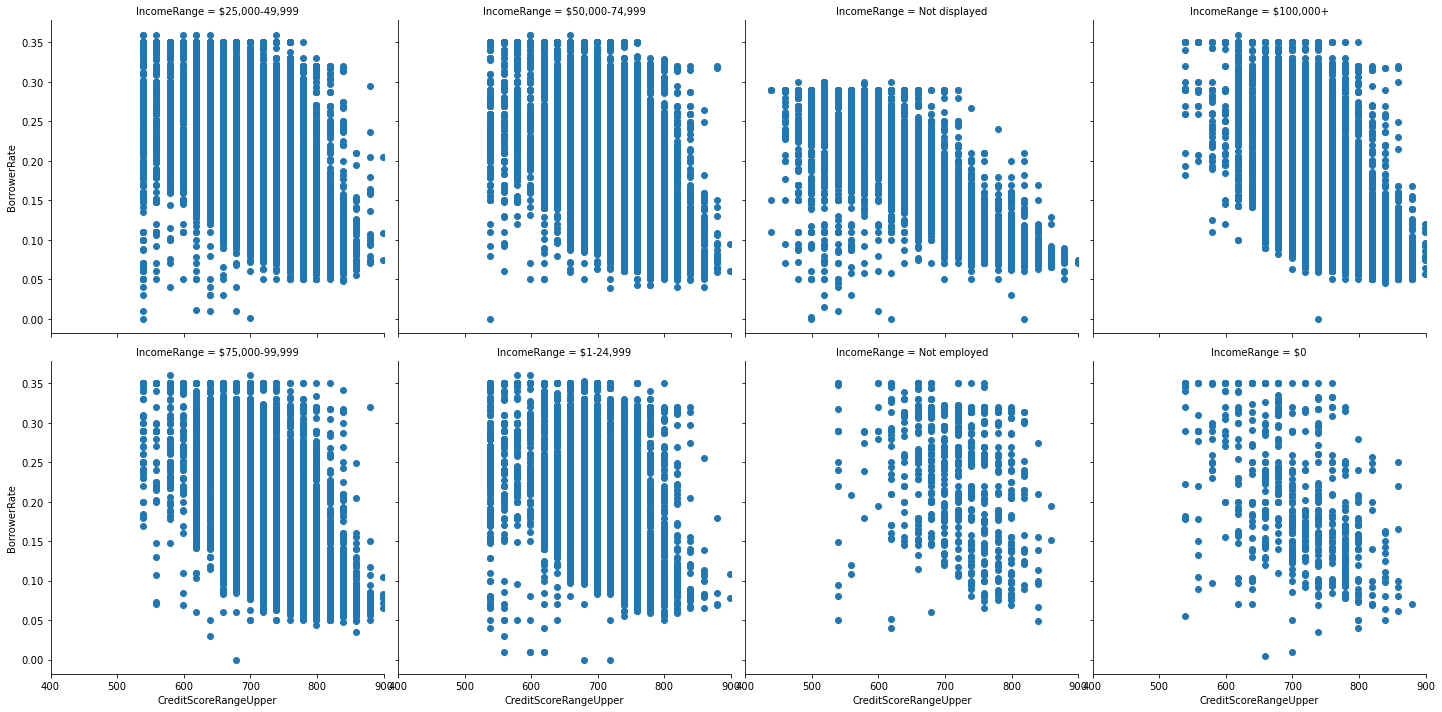

In [43]:
#Create a plot of the relationship between BorrowerRate, CreditScoreRangeUpper, and IncomeRange
g = sb.FacetGrid(data = loan_clean, col='IncomeRange', height=5, col_wrap=4)
g.map(plt.scatter, 'CreditScoreRangeUpper', 'BorrowerRate');
plt.xlim(400, 900);

> Let look closely on how the loan amount and interest rate affect the ultimate outcome of the loan.

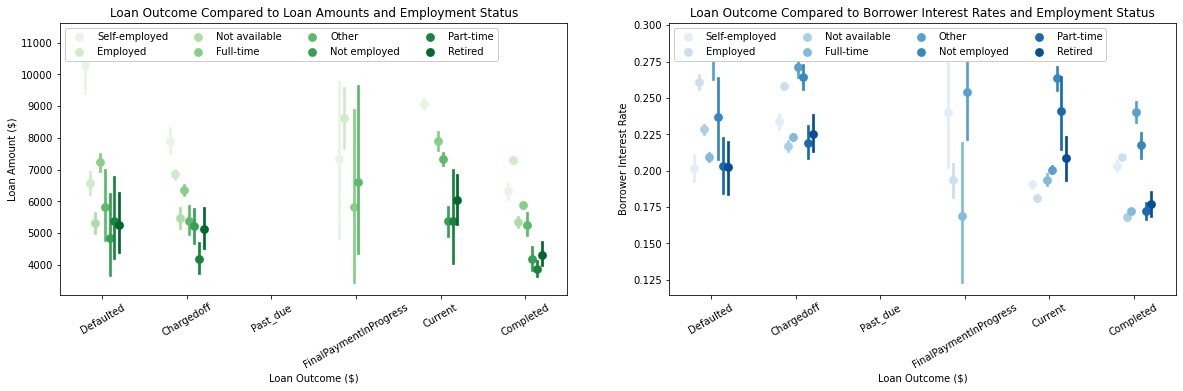

In [44]:
#Plot relationship of LoanStatus against LoanAmount and BorrowerRate
fig, ax = plt.subplots(ncols=2, figsize = [20,5])
sb.pointplot(data = loan_clean, x = 'LoanStatus', y = 'LoanOriginalAmount', hue = 'EmploymentStatus',
           palette = 'Greens', linestyles = '', dodge = 0.4, ax=ax[0])
ax[0].set_title('Loan Outcome Compared to Loan Amounts and Employment Status')
ax[0].set_ylabel('Loan Amount ($)')
ax[0].set_xlabel('Loan Outcome ($)')
ax[0].legend(loc=2, ncol=4, framealpha=1);
ax[0].tick_params('x', labelrotation=30);

sb.pointplot(data = loan_clean, x = 'LoanStatus', y = 'BorrowerRate', hue = 'EmploymentStatus',
           palette = 'Blues', linestyles = '', dodge = 0.4, ax=ax[1])
ax[1].set_title('Loan Outcome Compared to Borrower Interest Rates and Employment Status')
ax[1].set_ylabel('Borrower Interest Rate')
ax[1].set_xlabel('Loan Outcome ($)')
ax[1].legend(loc=2, ncol=4, framealpha=1);
ax[1].tick_params('x', labelrotation=30);

> The loans that are in `past due` tend to have a larger difference in the loan amount and in the interest rate of the loan. And cancelled loans tended to have lower loan amounts and lower interest rates. Those are probably easier to cancel since would have less of a negative impact on the lender.

### The relationships observed in this part of the investigation. features that strengthened each other in terms of looking at feature(s) of interest

> Looking at the employment status duration, we noticed that employed borrowers have more current loans than loans in the remaining statuses. The factors that most seemed to affect a loan's outcome was the amount of money borrowed and the interest rate of the loan. Higher interest, high value loans seems to be more likely to be past due. Employed individuals had the highest spread in the data, which makes sense since I employed individuals are more likely to apply for and receive loans.

> It was also observed that as the borrower's credit score increases, the interest rate decreases.

### Interesting or surprising interactions between features

> It really surprised me to see that people who are full-time employees having the highest rate of loan defaulting  and charged off. My expectation was to see unemployed individuals defaulting loans.

## Conclusions
> The project was focused much on answering the following questions:
- What factors affect a loan’s outcome status?
- What affects the borrower’s APR or interest rate?
- Are there differences between loans depending on how large the original loan amount was?

> So in summary, the factors that most seemed to affect a loan's outcome was the `amount of money borrowed` and the `interest rate` of the loan. The Higher the `interest rate`, and  `high loan values` are likely to be past due. The employment statues had an enfluence of `borrowers Apr`. This was seen as the Employed individuals had the highest spread in the data, meaning that most of them were in current loan status. The higher the original loan amount the higher the loan appers to be.


> The factors that most affected the borrower's interest rate were investigated further down by the correlation heat matrix. None of the features had a strong correlation but the highest was the credit score. As the borrower's credit score increases, the interest rate decreases. 

> Despite that there is no much interesting difference between the `categories of Loan Status` and the `borrower interest rate`, `charged off` and `defaulted loans` are higher than the rest of loan status. looking at the correlation between loan status to the original loan amounts, it actually appears as though the larger the loan amount, the more chance of being in current loan status.


In [2]:
git remote

SyntaxError: invalid syntax (2850438372.py, line 1)